# 1. Exploratory data analysis

## 1.1 Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## 1.2 Data undestanding

In [2]:
Housing = pd.read_csv('../Data/melb_data.csv', parse_dates=['Date'])
Housing.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1424,Brunswick West,5/8 Murray St,2,u,500000.0,S,Brad,2016-07-16,5.9,3055.0,...,1.0,1.0,0.0,75.0,1970.0,Moreland,-37.75950,144.94360,Northern Metropolitan,7082.0
9613,Lalor,34 Cyprus St,3,h,716000.0,S,Harcourts,2017-06-17,16.3,3075.0,...,1.0,4.0,651.0,NaN,NaN,Whittlesea,-37.67388,145.02069,Northern Metropolitan,8279.0
4173,Moorabbin,118 Rowans Rd,3,h,901000.0,S,O'Brien,2016-07-16,14.6,3189.0,...,2.0,3.0,558.0,133.0,1955.0,Kingston,-37.94350,145.05220,Southern Metropolitan,2555.0
2697,Footscray,6/63 Everard St,2,u,615000.0,S,Sweeney,2016-04-16,6.4,3011.0,...,1.0,3.0,207.0,NaN,1960.0,Maribyrnong,-37.79750,144.88550,Western Metropolitan,7570.0
10948,Burwood East,2/7 Bellevue Av,2,u,746000.0,SP,Jellis,2017-12-08,14.7,3151.0,...,1.0,2.0,239.0,NaN,NaN,Whitehorse,-37.85148,145.15345,Eastern Metropolitan,4048.0


In [3]:
Housing.shape

(13580, 21)

In [4]:
Housing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [5]:
Housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## 1.3 Preliminary cleaning

### 1.3.1 Columns names unification

In [6]:
Housing.rename(columns={'Car':'CarSpots',
                        'Landsize':'LandSize',
                        'Bathroom':'Bathrooms',
                        'Bedroom2':'Bedrooms',
                        'Propertycount':'PropertyCount',
                        'Regionname':'RegionName',
                        'Longtitude':'Longitude',
                        'Lattitude':'Latitude',
                        'Date':'SaleDate'}, inplace=True)

Columns rename to PascalCase.

### 1.3.2 Unnecessary columns drop

In [7]:
Housing.drop(columns=['Address', 'Postcode', 'SellerG'], inplace=True)
Housing.tail()

,Suburb,Rooms,Type,Price,Method,SaleDate,Distance,Bedrooms,Bathrooms,CarSpots,LandSize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
13575,Wheelers Hill,4,h,1245000.0,S,2017-08-26,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,1031000.0,SP,2017-08-26,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,3,h,1170000.0,S,2017-08-26,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,4,h,2500000.0,PI,2017-08-26,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,4,h,1285000.0,SP,2017-08-26,6.3,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


## 1.4 Further data exploration

### 1.4.1 Descriptive statistics of features

In [8]:
Housing.describe().applymap(lambda x: f"{x:0.2f}")

,Rooms,Price,Distance,Bedrooms,Bathrooms,CarSpots,LandSize,BuildingArea,YearBuilt,Latitude,Longitude,PropertyCount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


In [9]:
Housing.describe(include='object')

,Suburb,Type,Method,CouncilArea,RegionName
count,13580,13580,13580,12211,13580
unique,314,3,5,33,8
top,Reservoir,h,S,Moreland,Southern Metropolitan
freq,359,9449,9022,1163,4695


In [10]:
Housing.describe(include='Datetime64')

,SaleDate
count,13580
unique,58
top,2017-05-27 00:00:00
freq,473
first,2016-01-28 00:00:00
last,2017-12-08 00:00:00


### 1.4.2 The number of occurrences of each name in categorical variables

In [11]:
print("Number of unique values for feature Suburb: " + str(Housing['Suburb'].nunique()))
Housing['Suburb'].value_counts().head(5)

Number of unique values for feature Suburb: 314


Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
Name: Suburb, dtype: int64

In [12]:
print("Number of unique values for feature PropertyCount: " + str(Housing['PropertyCount'].nunique()))
Housing['PropertyCount'].value_counts().head(5)

Number of unique values for feature PropertyCount: 311


21650.0    359
8870.0     298
14949.0    260
10969.0    249
14577.0    239
Name: PropertyCount, dtype: int64

In [13]:
print("Number of unique values for feature Type: " + str(Housing['Type'].nunique()))
Housing['Type'].value_counts()

Number of unique values for feature Type: 3


h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [14]:
print("Number of unique values for feature Method: " + str(Housing['Method'].nunique()))
Housing['Method'].value_counts()

Number of unique values for feature Method: 5


S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [15]:
print("Number of unique values for feature CouncilArea: " + str(Housing['CouncilArea'].nunique()))
Housing['CouncilArea'].value_counts().head(5)

Number of unique values for feature CouncilArea: 33


Moreland         1163
Boroondara       1160
Moonee Valley     997
Darebin           934
Glen Eira         848
Name: CouncilArea, dtype: int64

In [16]:
print("Number of unique values for feature RegionName: " + str(Housing['RegionName'].nunique()))
Housing['RegionName'].value_counts()

Number of unique values for feature RegionName: 8


Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: RegionName, dtype: int64

### 1.4.3 Sum of NaN according to variable names

In [17]:
Housing.isna().sum().iloc[Housing.isna().sum().to_numpy().nonzero()]

CarSpots          62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

There are four features containing NaN data. Almost half of cases has no building area specified. 

## 1.5 Data visualization 

### 1.5.1 Correlation matrix

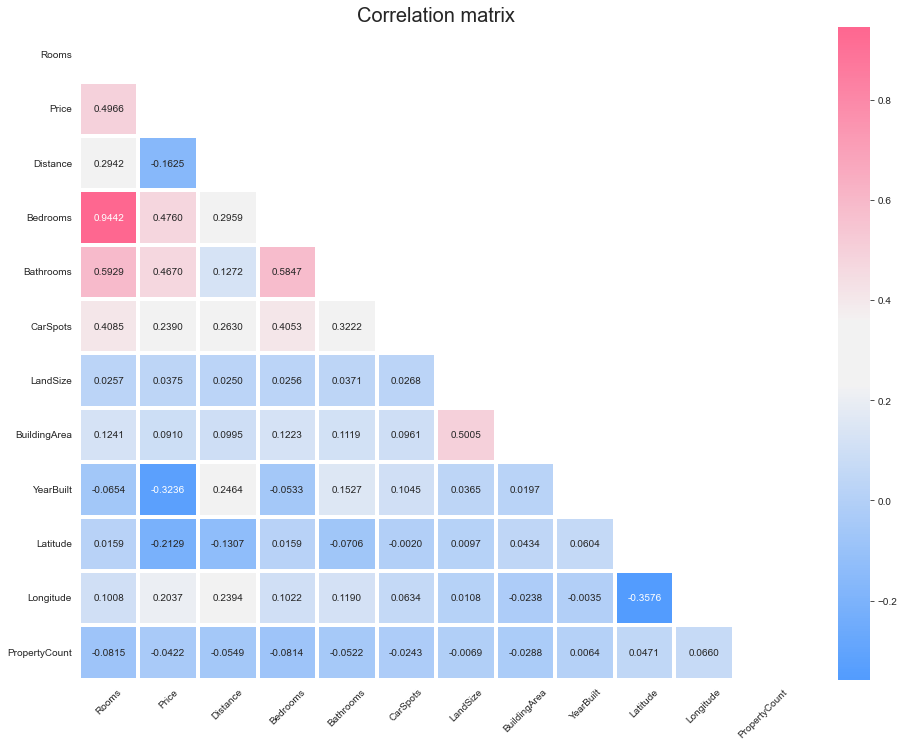

In [18]:
sns.set_style('white')

f, ax =plt.subplots(figsize=(16,12))

sns.heatmap(Housing.corr(), annot=True, cmap=sns.diverging_palette(h_neg=252,h_pos=359,s=99,l=64,sep=27, as_cmap=True),
            fmt= '.4f', mask= np.triu(Housing.corr()), linewidths=4, ax=ax)
ax.set_title('Correlation matrix', fontdict={'fontsize':20})
plt.xticks(rotation=45)
plt.show()

Rooms and bedrooms are strictly correlated. Presumably one of these variables should be eliminated in later data preprocessing.

### 1.5.2 Countplot of cases in each category

<AxesSubplot:xlabel='Method', ylabel='count'>

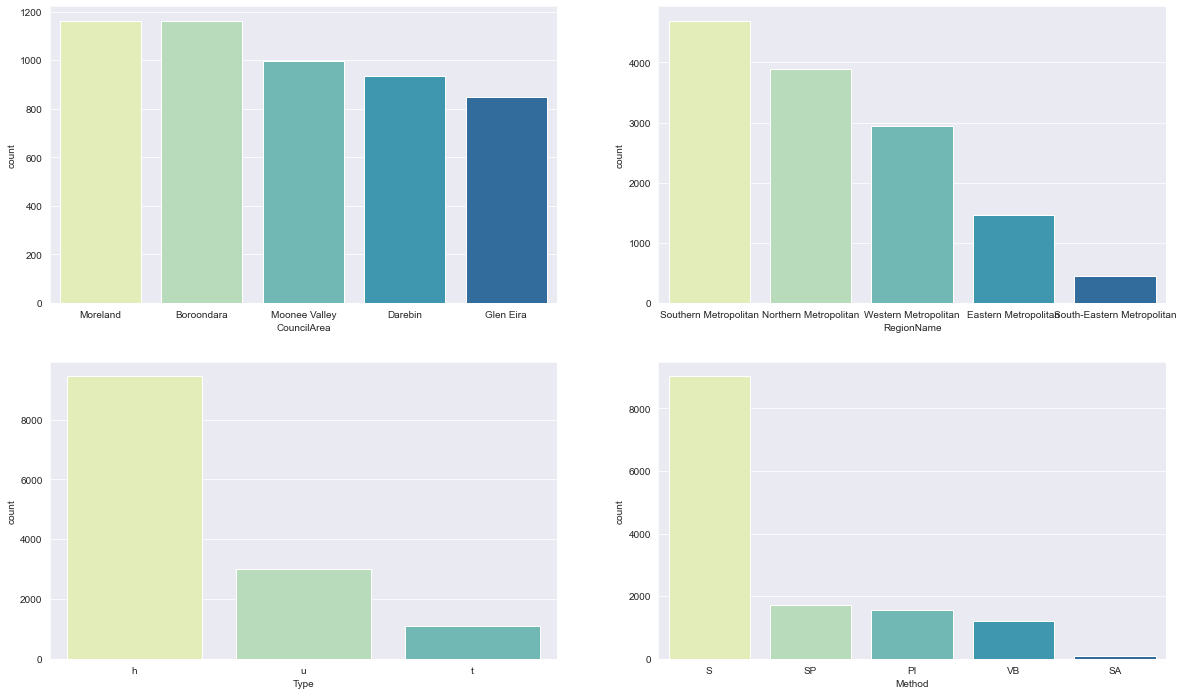

In [19]:
sns.set_palette('YlGnBu')
sns.set_style('darkgrid')

f, ax = plt.subplots(2, 2, figsize=(20,12))

sns.countplot(ax=ax[0,0], x='CouncilArea', data=Housing, order=Housing.CouncilArea.value_counts().iloc[:5].index)
sns.countplot(ax=ax[0,1], x='RegionName', data=Housing, order=Housing.RegionName.value_counts().iloc[:5].index)
sns.countplot(ax=ax[1,0], x='Type', data=Housing)
sns.countplot(ax=ax[1,1], x='Method', data=Housing)

Comparable number of offers were about properties located in Moreland and Boroondara council area. When it comes to region Southern Metropolitan had most offers. Third countplot shows that most of sale announcements concerned house, villa and cottage building type. Majority of properties were sold (S - property sold, SP - property sold prior, PI - property passed in, VB - vendor bid, SA - sold after auction). 

### 1.5.3 Countplot of 10 suburbs with the most properties for sale

<AxesSubplot:xlabel='Suburb', ylabel='count'>

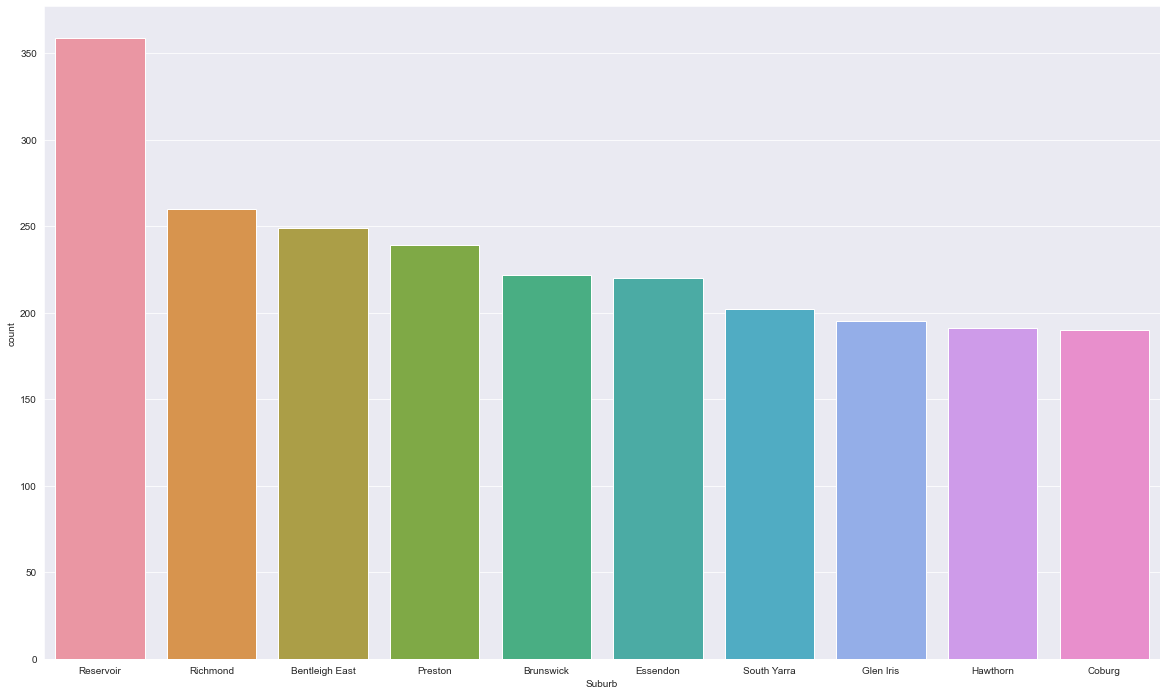

In [20]:
f, ax = plt.subplots(figsize=(20,12))
sns.countplot(x='Suburb', data=Housing, order=Housing.Suburb.value_counts().iloc[:10].index)

Bar graph shows suburbs which had largest number of sale anouncements. Reservoir clearly surpasses other suburbs by about 50%. Other differences are indistinct.

### 1.5.4 Histogram that places the number of sales on a time axis

<AxesSubplot:xlabel='Date', ylabel='Number of sales'>

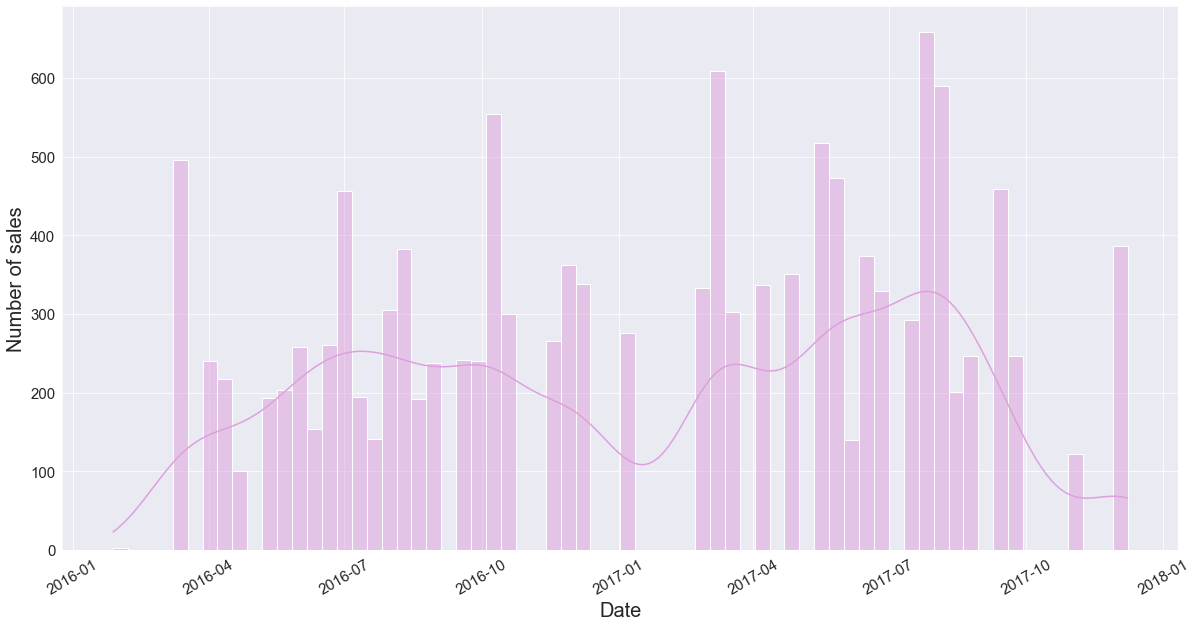

In [21]:
plt.figure(figsize=(20,10))
plt.xticks(size=15, rotation=30)
plt.yticks(size=15)
plt.xlabel('Date', size=20)
plt.ylabel('Number of sales', size=20)
sns.histplot(data=Housing, x='SaleDate', color='plum', binwidth=10, kde=True)

Record sales occurred in August 2017. The period examined is too short to unequivocally state whether there is a phenomenon of yearly seasonality in the demand on the real estate market. Nonetheless histogram shows significant drop in winter season 2017 what may herald such phenomenon.

### 1.5.5 Scatterplot - properties co-ordinates

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

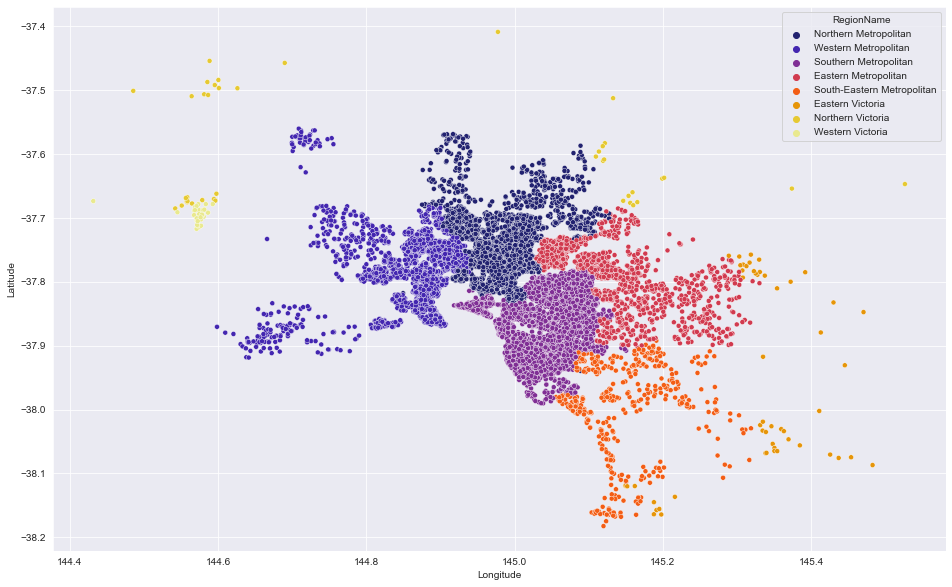

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=Housing, x='Longitude', y='Latitude', hue='RegionName', palette='CMRmap', s=25)

Properties locations mapped on graph with latitude and longitude co-ordinated grouped by regions.

### 1.5.6 Properties prices in each Melbourne region

<AxesSubplot:xlabel='RegionName', ylabel='Price'>

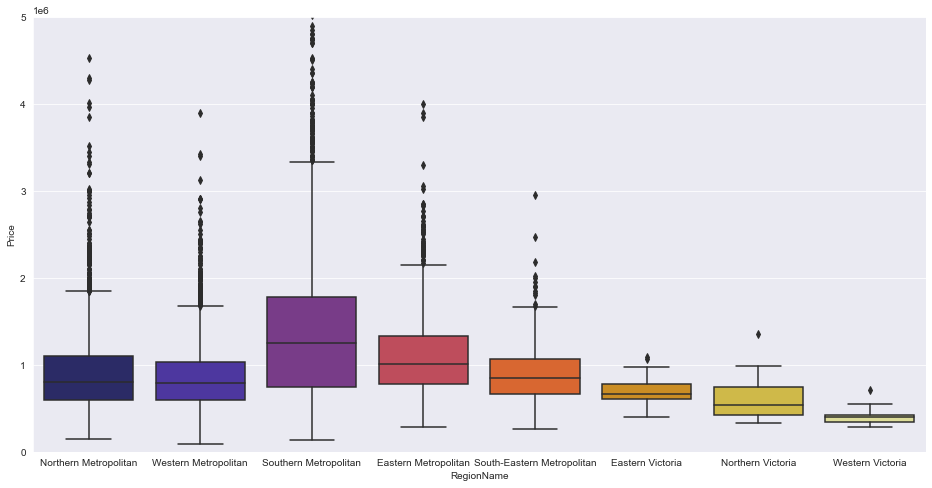

In [23]:
plt.figure(figsize=(16,8))
plt.ylim(0, 5000000)
sns.boxplot(data=Housing, x='RegionName', y='Price', palette='CMRmap')

Highest median of prices is in Southern Metropolitan region. Also this region has largest price spread. The cheapest properties are in Western Victioria. Probably due to long distance from Melboure centre. 

### 1.5.7 Prices according to Bedrooms number

<AxesSubplot:xlabel='Bedrooms', ylabel='Price'>

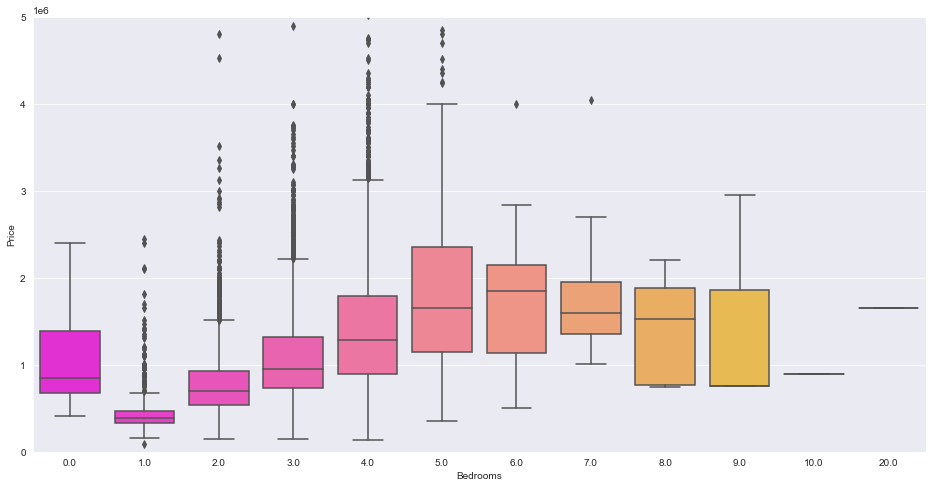

In [24]:
plt.figure(figsize=(16,8))
plt.ylim(0, 5000000)
sns.boxplot(data=Housing, x='Bedrooms', y='Price', palette='spring')

Bedrooms number above five have no significant influence in price formation. Offers with 1-5 bedrooms contains many outlying cases.

### 1.5.8 Building area divided into Melbourne regions 

<AxesSubplot:xlabel='RegionName', ylabel='BuildingArea'>

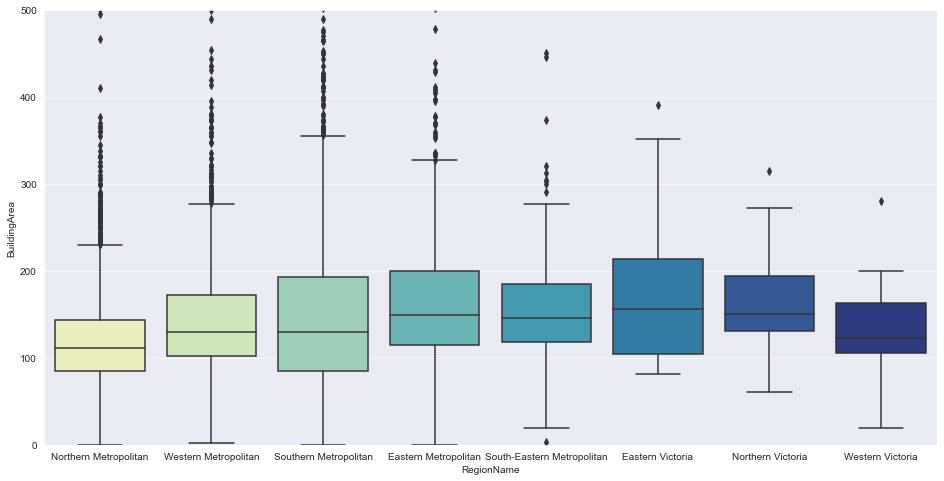

In [25]:
plt.figure(figsize=(16,8))
plt.ylim(0, 500)
sns.boxplot(data=Housing, x='RegionName', y='BuildingArea', palette='YlGnBu')

Regions do not differ significantly from each other when it comes to median building area comparison.

### 1.5.9 Land size divided into Melbourne regions 

<AxesSubplot:xlabel='RegionName', ylabel='LandSize'>

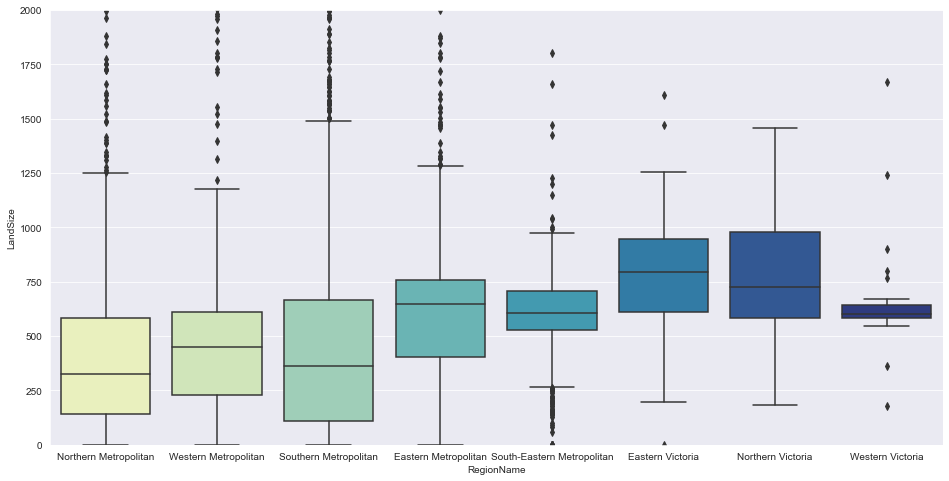

In [26]:
plt.figure(figsize=(16,8))
plt.ylim(0, 2000)
sns.boxplot(data=Housing, x='RegionName', y='LandSize', palette='YlGnBu')

On the other hand regions located in city suburbs have properties with greater land size on average.

### 1.5.10  Price depending on distance from city center 

<AxesSubplot:xlabel='Distance', ylabel='Price'>

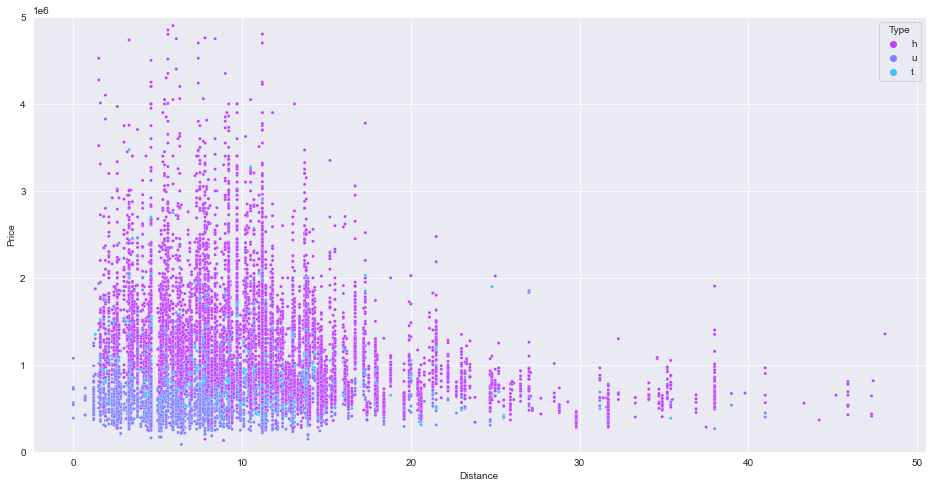

In [27]:
plt.figure(figsize=(16,8))
plt.ylim(0, 5000000)
sns.scatterplot(data=Housing, x='Distance', y='Price', hue="Type", palette="cool_r",
                linewidth=0.2, s=10)

Most houses with price over 2 milion dollars are located closer than 20 miles to city center.

### 1.5.11 Building age and distance scatterplot

<AxesSubplot:xlabel='YearBuilt', ylabel='Distance'>

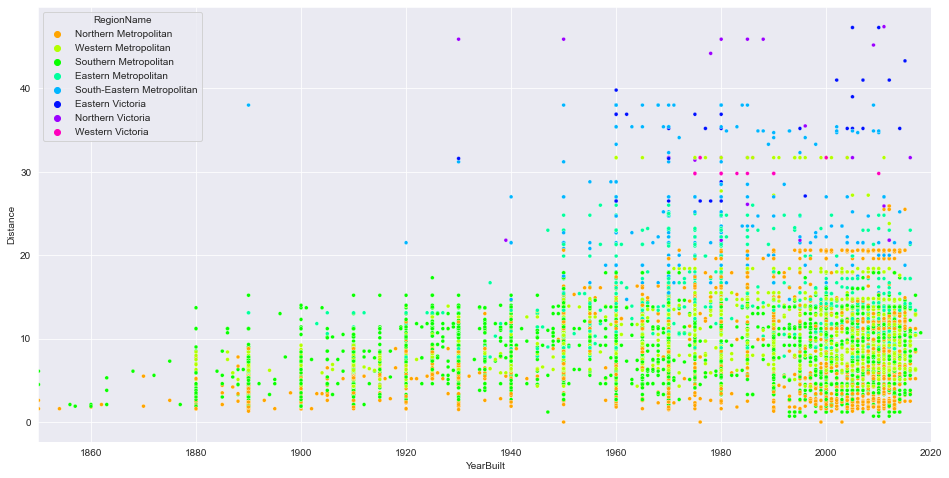

In [28]:
plt.figure(figsize=(16,8))
plt.xlim(1850, 2020)
sns.scatterplot(data=Housing, x='YearBuilt', y='Distance', hue="RegionName", palette="hsv",
                linewidth=0.3, s=15)

Also buildings more than 20 miles away from Melbourne only existed after 1940. Presumably when personal car transport gained on popularity.

### 1.5.12 Scatterplot of land size to building area

<AxesSubplot:xlabel='LandSize', ylabel='BuildingArea'>

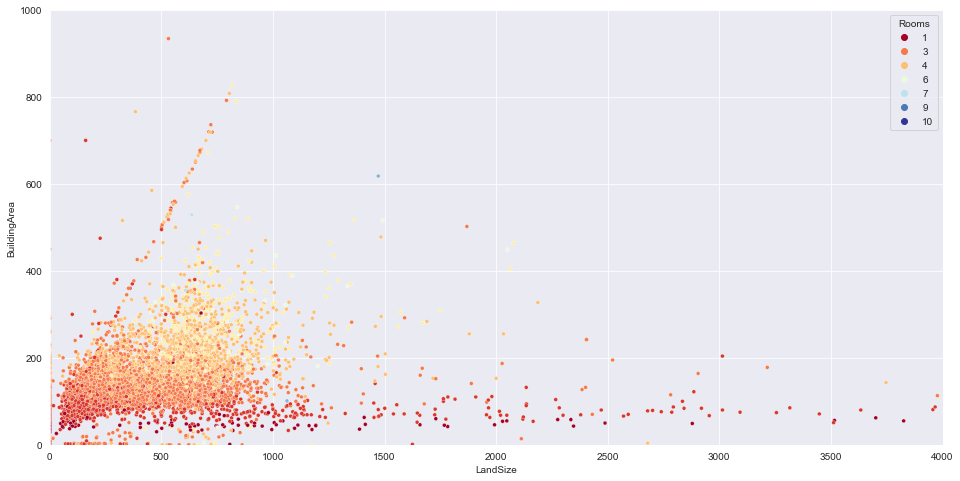

In [29]:
plt.figure(figsize=(16,8))
plt.xlim(0, 4000)
plt.ylim(0, 1000)
sns.scatterplot(data=Housing, x='LandSize', y='BuildingArea', hue="Rooms", palette="RdYlBu",
                linewidth=0.3, s=15)

It can be deduced that observations forming a straight line are located in the very center of the city where houses are tightly built with no space for garden. 

### 1.5.13 Barplots - building area divided into rooms realated categories 

<AxesSubplot:xlabel='CarSpots', ylabel='BuildingArea'>

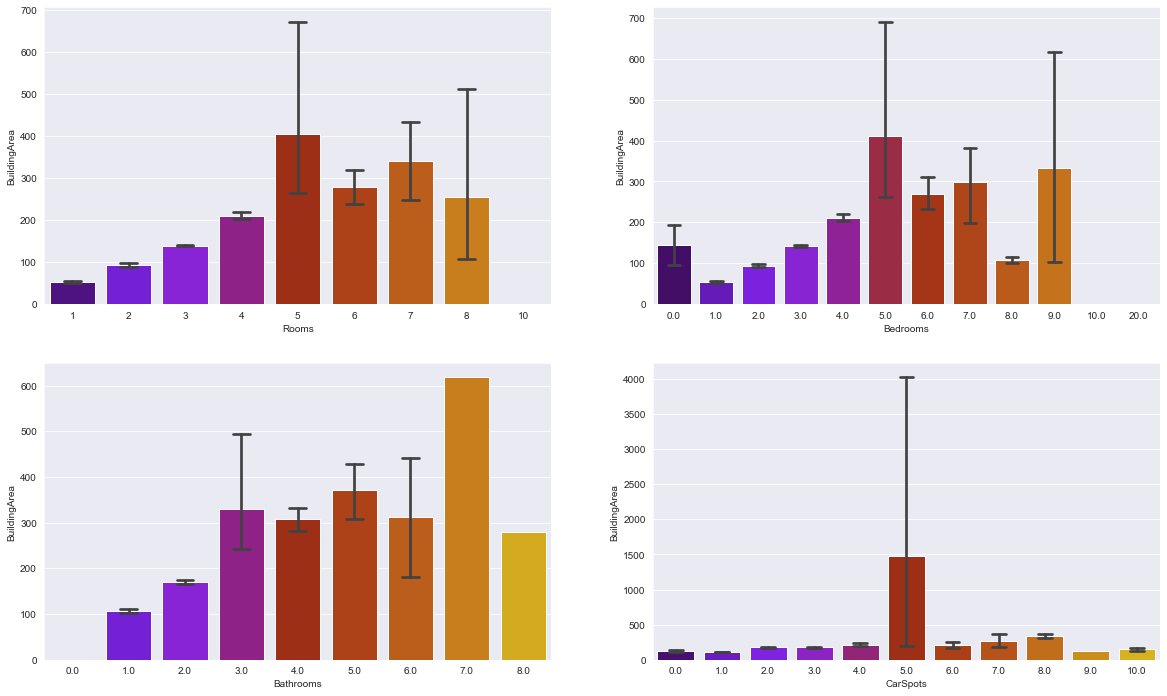

In [30]:
f, ax = plt.subplots(2, 2, figsize=(20,12))

sns.barplot(ax=ax[0,0], x='Rooms', y='BuildingArea', data=Housing, palette='gnuplot', capsize=0.3)
sns.barplot(ax=ax[0,1], x='Bedrooms', y='BuildingArea', data=Housing, palette='gnuplot', capsize=0.3)
sns.barplot(ax=ax[1,0], x='Bathrooms', y='BuildingArea', data=Housing, palette='gnuplot', capsize=0.3)
sns.barplot(ax=ax[1,1], x='CarSpots', y='BuildingArea', data=Housing, palette='gnuplot', capsize=0.3)

First three charts looks similarly because are somehow correlated. High difference on fourth graph can be caused by outliers or buildings area above certain value are obligated to have at least 5 car spots.

In [31]:
Housing.to_csv("../Data/HousingCleaned.csv", index = False)